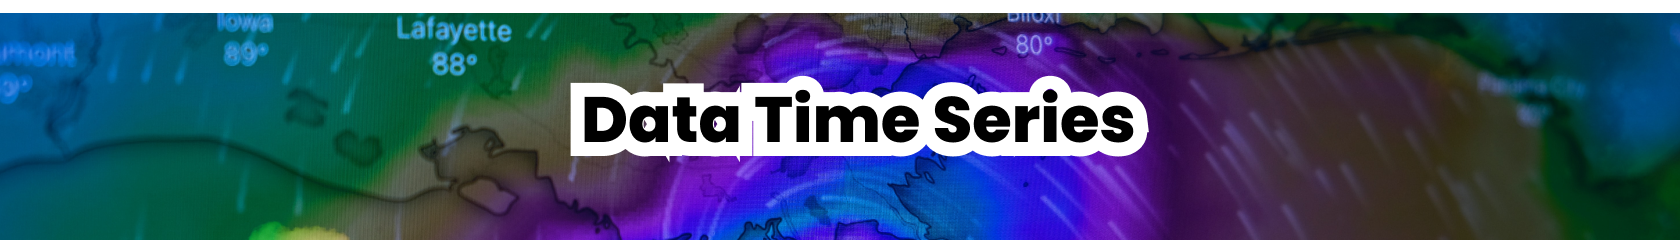

# Identitas

---

Nama: Nanda Lidya Fadillah

---

No. Registrasi: 1494037162100-195

---

# Pendahuluan
Berikut ini merupakan proyek membuat model Machine Learning dengan Data Time Series

**Tujuan:** 
1. Membuat program menggunakan LSTM dalam arsitektur model.
2. Menggunakan minimal 1000 sampel data,
3. Menggunakan model sequential, 
4. Menghasilkan validation set sebesar 20%,
5. MAE kurang dari 10%
6. Menggunakan Learning Rate pada Optimizer

**Judul Project:** 
Time Series dengan LSTM dengan dataset max_planck_weather_ts.csv

# Program

In [16]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data_weather= pd.read_csv('/content/max_planck_weather_ts.csv')
data_weather

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [18]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [19]:
data_weather.dropna(axis=0)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [20]:
data_weather.isna().mean()

Date Time          0.0
p (mbar)           0.0
T (degC)           0.0
Tpot (K)           0.0
Tdew (degC)        0.0
rh (%)             0.0
VPmax (mbar)       0.0
VPact (mbar)       0.0
VPdef (mbar)       0.0
sh (g/kg)          0.0
H2OC (mmol/mol)    0.0
rho (g/m**3)       0.0
wv (m/s)           0.0
max. wv (m/s)      0.0
wd (deg)           0.0
dtype: float64

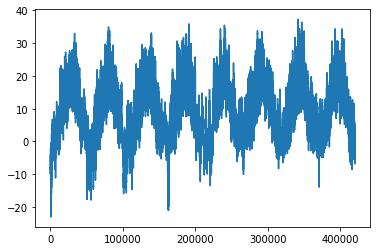

In [21]:
temperature = data_weather['T (degC)']
temperature.plot()

In [22]:
data_weather=pd.to_datetime(data_weather['Date Time'], format='%d.%m.%Y %H:%M:%S')
data_weather[:26]


0    2009-01-01 00:10:00
1    2009-01-01 00:20:00
2    2009-01-01 00:30:00
3    2009-01-01 00:40:00
4    2009-01-01 00:50:00
5    2009-01-01 01:00:00
6    2009-01-01 01:10:00
7    2009-01-01 01:20:00
8    2009-01-01 01:30:00
9    2009-01-01 01:40:00
10   2009-01-01 01:50:00
11   2009-01-01 02:00:00
12   2009-01-01 02:10:00
13   2009-01-01 02:20:00
14   2009-01-01 02:30:00
15   2009-01-01 02:40:00
16   2009-01-01 02:50:00
17   2009-01-01 03:00:00
18   2009-01-01 03:10:00
19   2009-01-01 03:20:00
20   2009-01-01 03:30:00
21   2009-01-01 03:40:00
22   2009-01-01 03:50:00
23   2009-01-01 04:00:00
24   2009-01-01 04:10:00
25   2009-01-01 04:20:00
Name: Date Time, dtype: datetime64[ns]

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [24]:
def data_weather_to_X_y(data_weather, window_size=5):
  data_weather_as_np=data_weather.to_numpy()
  X = []
  y = []
  for i in range(len(data_weather_as_np)-window_size):
    row = [[a] for a in data_weather_as_np[i:i+5]]
    X.append(row)
    label = data_weather_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)
  
WINDOW_SIZE = 5
X, y = data_weather_to_X_y(temperature, WINDOW_SIZE)
X.shape, y.shape

((420546, 5, 1), (420546,))

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(336436, 5, 1) (336436,)
(84110, 5, 1) (84110,)


In [37]:
threshold_mae = (temperature.max() - temperature.min()) * 10/100
threshold_mae

6.029000000000001

In [57]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<threshold_mae):
      print("\nMae telah mencapai standar")
      self.model.stop_training = True
callbacks = myCallback()

In [58]:
model= Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(60))
model.add(Dropout(0.2))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60)                14880     
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 488       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15,377
Trainable params: 15,377
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1.0000e-04), 
    metrics=["mae"])


In [60]:
model.fit(x_train, 
          y_train, 
          epochs=10, 
          validation_data=(x_test, y_test),
          callbacks=[callbacks])

Epoch 1/10
10514/10514 [==============================] - ETA: 0s - loss: 6.0251 - mae: 1.1123
Mae telah mencapai standar
10514/10514 [==============================] - 81s 7ms/step - loss: 6.0251 - mae: 1.1123 - val_loss: 0.1050 - val_mae: 0.2246


In [61]:
train_prediction=model.predict(x_train).flatten()
train_result=pd.DataFrame(data={'Train Predictions':train_prediction,'Actuals':y_train})
train_result

10514/10514 [==============================] - 26s 2ms/step


,Train Predictions,Actuals
0,-8.282931,-8.05
1,-8.086310,-7.62
2,-7.791384,-7.62
3,-7.552757,-7.91
4,-7.557188,-8.43
...,...,...
336431,17.844208,18.05
336432,17.760063,17.93
336433,17.625969,17.73
336434,17.406981,17.57


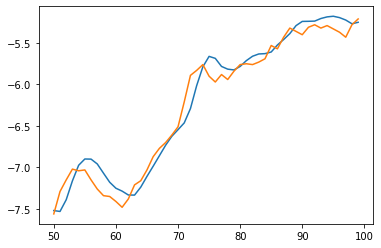

In [62]:
import matplotlib.pyplot as plt

plt.plot(train_result['Train Predictions'][50:100])
plt.plot(train_result['Actuals'][50:100])

In [63]:
test_predictions=model.predict(x_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals':y_test})
test_results

2629/2629 [==============================] - 9s 3ms/step


,Test Predictions,Actuals
0,17.145206,17.36
1,17.061647,17.15
2,16.838104,16.92
3,16.582874,16.69
4,16.348707,16.51
...,...,...
84105,-3.805818,-4.05
84106,-3.809005,-3.35
84107,-3.619273,-3.16
84108,-3.343034,-4.23


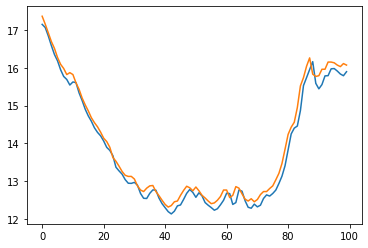

In [66]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])